In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

In [2]:
#What do I have here?
!ls

 2sim.mp4				   PolaRxS_CHAINdata__2016_019.csv
 anubisplot.py				   PolaRxS_CHAINdata__2016_020.csv
'DS Process walk through.ipynb'		   PolaRxS_CHAINdata__2016_021.csv
 igs					   PolaRxS_CHAINdata__2017_001.csv
 Matplotlib_Animation_demonstrated.ipynb   PolaRxS_CHAINdata__2017_002.csv
 ml_database__2016_019.csv		   sim.mp4
 ml_database__2016_020.csv		   teqcplot.py
 ml_database__2017_001.csv


In [3]:
#Alright -- lets read the csv
df = pd.read_csv('ml_database__2016_020.csv')
df.head()

,Unnamed: 0,datetime,doy,ut,azimuth [deg],elevation [deg],geographic latitude [deg],geographic longitude [deg],TEC at current time [TECU],dTEC 0min-15s to 0min-0s [TECU],...,doy at prediction time(24h) [sec],TEC at prediction time(24h) [TECU],dTEC at prediction time(24h) [TECU],S4 at prediction time(24h) [dimensionless],S4 projected to vertical at prediction time(24h) [dimensionless],sigmaPhi at prediction time(24h) [radians],sigmaPhi projected to vertical at prediction time(24h) [radians],CHAIN station,CHAIN station model,CHAIN station ID number
0,0,2016-01-20 00:01:00,20,60,175.0,44.0,73.004093,-85.026041,21.926,0.047,...,21,20.581,-0.022,0.061,0.044655,0.044,0.033665,arc,PolaRxS,1
1,1,2016-01-20 00:02:00,20,120,175.0,44.0,73.004093,-85.026041,21.809,-0.037,...,21,20.230,-0.029,0.046,0.034198,0.039,0.030390,arc,PolaRxS,1
2,2,2016-01-20 00:03:00,20,180,175.0,45.0,73.004093,-85.026041,22.401,0.077,...,21,17.207,-0.013,0.041,0.030481,0.042,0.031310,arc,PolaRxS,1
3,3,2016-01-20 00:04:00,20,240,174.0,45.0,73.004093,-85.026041,19.990,-0.083,...,21,15.798,-0.004,0.048,0.035685,0.036,0.026084,arc,PolaRxS,1
4,4,2016-01-20 00:05:00,20,300,174.0,45.0,73.004093,-85.026041,22.938,0.029,...,21,18.930,0.000,0.058,0.042249,0.044,0.032472,arc,PolaRxS,1


In [4]:
# This is "huge" (as Trump would say) dataframe. 
"""
I can't explain the whole data set here but it is a 
GNSS scnitillation data for several GNSS ground based stations.
I will just pick one station.

"""
#how many stations are here?
df['CHAIN station'].unique()

array(['arc', 'arv', 'chu', 'edm', 'fsi', 'fsm', 'gil', 'gjo', 'mcm',
       'rab', 'ran', 'rep'], dtype=object)

In [5]:
#just taking one station (I selected 'edm') and pick the timethree features  I would like to plot

dfst = df.loc[df['CHAIN station'] == 'edm', ['datetime','sigmaPhi projected to vertical [radians]', 
                                          'dTEC 0min-15s to 0min-0s [TECU]', 'TEC at current time [TECU]']]

#also setting my index
dfst['datetime'] = pd.to_datetime(dfst['datetime'])
dfst.set_index('datetime', inplace=True)

dfst.head()

,sigmaPhi projected to vertical [radians],dTEC 0min-15s to 0min-0s [TECU],TEC at current time [TECU]
datetime,,,
2016-01-20 00:01:00,0.025323,-0.0105,29.817
2016-01-20 00:02:00,0.025013,-0.0085,29.185
2016-01-20 00:03:00,0.024032,-0.0105,28.733
2016-01-20 00:04:00,0.024493,-0.0100,31.069
2016-01-20 00:05:00,0.025142,-0.0105,29.560


In [6]:
# I am gonna rename the columns to make them shorter
dfst.rename(columns={"sigmaPhi projected to vertical [radians]":"sigmaPhi", 
                    "dTEC 0min-15s to 0min-0s [TECU]":"dTEC", "TEC at current time [TECU]":"TEC"}, inplace=True)
dfst.head()

,sigmaPhi,dTEC,TEC
datetime,,,
2016-01-20 00:01:00,0.025323,-0.0105,29.817
2016-01-20 00:02:00,0.025013,-0.0085,29.185
2016-01-20 00:03:00,0.024032,-0.0105,28.733
2016-01-20 00:04:00,0.024493,-0.0100,31.069
2016-01-20 00:05:00,0.025142,-0.0105,29.560


In [7]:
#I am normalizing the features to the same scale (min=0, max=1)

dfst['normSigmaPhi'] = (dfst['sigmaPhi'] - dfst['sigmaPhi'].min())/(dfst['sigmaPhi'].max() - dfst['sigmaPhi'].min())
dfst['normdTEC'] = (dfst['dTEC'] - dfst['dTEC'].min())/(dfst['dTEC'].max() - dfst['dTEC'].min())
dfst['normTEC'] = (dfst['TEC'] - dfst['TEC'].min())/(dfst['TEC'].max() - dfst['TEC'].min())

In [8]:
#here is the final dataframe 
dfst.head()

,sigmaPhi,dTEC,TEC,normSigmaPhi,normdTEC,normTEC
datetime,,,,,,
2016-01-20 00:01:00,0.025323,-0.0105,29.817,0.021365,0.575581,0.456518
2016-01-20 00:02:00,0.025013,-0.0085,29.185,0.020222,0.577696,0.431399
2016-01-20 00:03:00,0.024032,-0.0105,28.733,0.016602,0.575581,0.413434
2016-01-20 00:04:00,0.024493,-0.0100,31.069,0.018305,0.576110,0.506280
2016-01-20 00:05:00,0.025142,-0.0105,29.560,0.020699,0.575581,0.446304


# Just a plot

In [9]:
# What do I want to do. Just the normalized three features as subplots.
# There are many ways, but here is how I would do it


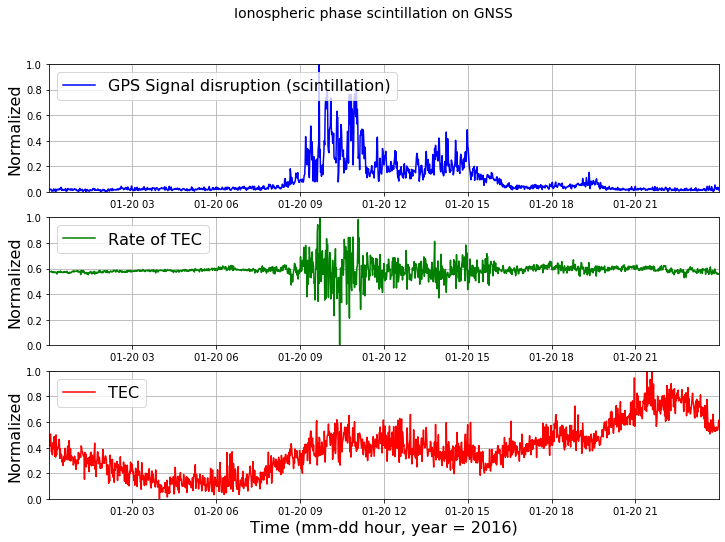

In [10]:
fig, ax = plt.subplots(3, 1, figsize = (12, 8))
fig.suptitle('Ionospheric phase scintillation on GNSS', fontsize=14)
#limits
#-X limits
#just use the min and max values of the df index
ax[0].set_xlim(dfst.index.min(),dfst.index.max())
ax[1].set_xlim(dfst.index.min(),dfst.index.max())
ax[2].set_xlim(dfst.index.min(),dfst.index.max())

#-Y limits
#I have normalized my data sets (min=0, max=1)
ax[0].set_ylim(0,1)
ax[1].set_ylim(0,1)
ax[2].set_ylim(0,1)

# Lets label the data sets

ax[0].set_ylabel("Normalized", fontsize=16)
ax[1].set_ylabel("Normalized", fontsize=16)
ax[2].set_xlabel("Time (mm-dd hour, year = 2016)", fontsize=16)
ax[2].set_ylabel("Normalized", fontsize=16)

#I like my plots to have some grids

ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

# Lets plot our data
time = dfst.index
sigmaPhi = dfst['normSigmaPhi']
dTEC = dfst['normdTEC']
TEC = dfst['normTEC']

plot1, = ax[0].plot(time, sigmaPhi,'b-', label="GPS Signal disruption (scintillation)") 
plot2, = ax[1].plot(time, dTEC,'g-', label="Rate of TEC")
plot3, = ax[2].plot(time, TEC,'r-', label="TEC")

# You would like to put some legends as well
# set lagends 
ax[0].legend([plot1], [plot1.get_label()], loc='upper left', fontsize=16)
ax[1].legend([plot2], [plot2.get_label()], loc='upper left', fontsize=16)
ax[2].legend([plot3], [plot3.get_label()], loc='upper left', fontsize=16)

plt.show()

# Animation

In [11]:
# My goal is to animate that.
# It is very simple in matplotlib
# I am gonna use the whole lines of codes from the above and just rename them (fig -- fig2, ax -- ax2)
# also, just initialize the time, sigmaPhi, dTEC, and TEC variables.

<IPython.core.display.Javascript object>


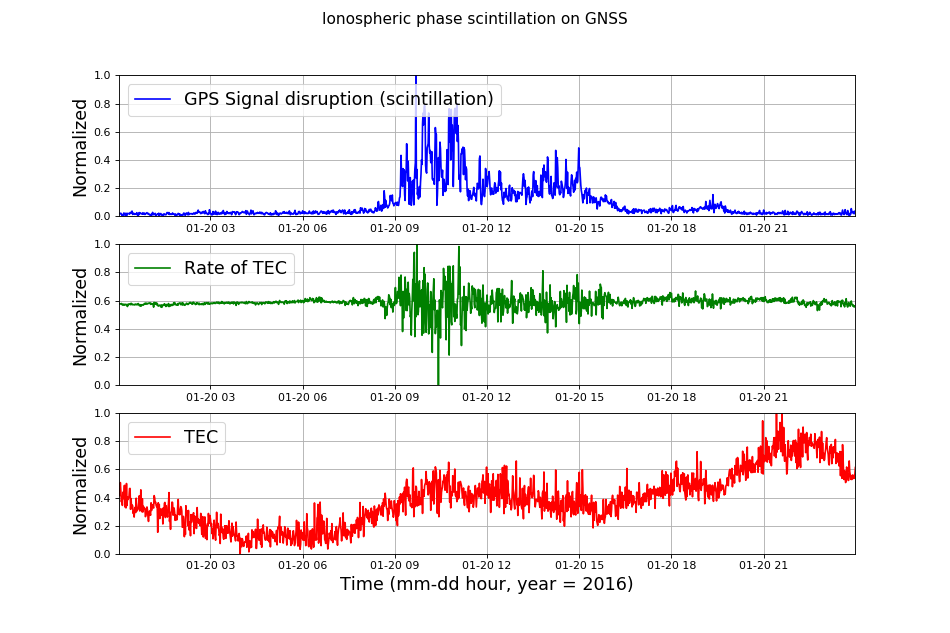

In [12]:
%matplotlib notebook
%matplotlib notebook
fig2, ax2 = plt.subplots(3, 1, figsize = (12, 8))
fig2.suptitle('Ionospheric phase scintillation on GNSS', fontsize=14)
#limits
#-X limits
#just use the min and max values of the df index
ax2[0].set_xlim(dfst.index.min(),dfst.index.max())
ax2[1].set_xlim(dfst.index.min(),dfst.index.max())
ax2[2].set_xlim(dfst.index.min(),dfst.index.max())

#-Y limits
#I have normalized my data sets (min=0, max=1)
ax2[0].set_ylim(0,1)
ax2[1].set_ylim(0,1)
ax2[2].set_ylim(0,1)

# Lets label the data sets

ax2[0].set_ylabel("Normalized", fontsize=16)
ax2[1].set_ylabel("Normalized", fontsize=16)
ax2[2].set_xlabel("Time (mm-dd hour, year = 2016)", fontsize=16)
ax2[2].set_ylabel("Normalized", fontsize=16)

#I like my plots to have some grids

ax2[0].grid(True)
ax2[1].grid(True)
ax2[2].grid(True)

# this time I will initialize them
time = 0
sigmaPhi = 0
dTEC = 0
TEC = 0

plt1, = ax2[0].plot(time, sigmaPhi,'b-', label="GPS Signal disruption (scintillation)") 
plt2, = ax2[1].plot(time, dTEC,'g-', label="Rate of TEC")
plt3, = ax2[2].plot(time, TEC,'r-', label="TEC")

# You would like to put some legends as well
# set lagends 
ax2[0].legend([plot1], [plot1.get_label()], loc='upper left', fontsize=16)
ax2[1].legend([plot2], [plot2.get_label()], loc='upper left', fontsize=16)
ax2[2].legend([plot3], [plot3.get_label()], loc='upper left', fontsize=16)


# Here is how you write the animation function. 
#This function will update the initialized variables (time, sigmaPhi, dTEC, and TEC)

def animate(i):
    data = dfst.iloc[:int(i+1)] #select data range
    
    time = data.index
    sigmaPhi = data['normSigmaPhi']
    dTEC = data['normdTEC']
    TEC = data['normTEC']
    
    plt1.set_data(time, sigmaPhi)
    plt2.set_data(time, dTEC)
    plt3.set_data(time, TEC)
    
    return plt1, plt2, plt3

## This is how you call your simulator
#The variables are:
"""
fig2 -- that is the figure I define at the top
animate --- is my animation function above
frames -- is number of frames or data points (the variable i in the animate function) to draw. 
           Here I used the length of my data set. You can basically put any number here if you would like to 
           animate part of the data.
interval -- is how many frames you would like to draw in ms.
repeat -- if repeat is True, the animation will repeat again and again, if False, the animation will just run once.
"""

ani = animation.FuncAnimation(fig2, animate, frames=len(dfst['sigmaPhi']), interval=1, repeat=False, blit=False, )



# Bingo